In [19]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
from IPython.display import Image


## Image Recognition

CIFAR-10 is one of the most well-known image dataset containing 60.000 different images which is created by the first person that should come to your mind in deep learning and his teammates. The size of all images in this dataset is 32x32x3 (RGB). If you don’t have any idea of what are the “3” in the third dimension and “RGB” in the brackets mean, I strongly recommend you to read this article. Moreover, there are 50.000 images for training a model and 10.000 images for evaluating the performance of the model. The classes and randomly selected 10 images of each class could be seen in the picture below. The goal is to idnetify each new image as one of these 10 categories.

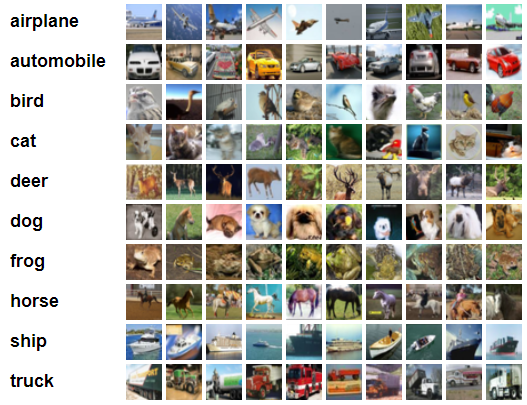

In [23]:
# CIFAR10.png
Image(filename='CIFAR10.png')

In [4]:
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 2
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 16, 16)        36928     
__________

This pattern will be repeated 3 times with 32, 64, and 128 feature maps. The eect will be
an increasing number of feature maps with a smaller and smaller size given the max pooling
layers. Finally an additional and larger Dense layer will be used at the output end of the
network in an attempt to better translate the large number feature maps to class values. We
can summarize a new network architecture as follows:
1. Convolutional input layer, 32 feature maps with a size of 3  3 and a rectier activation
function.
2. Dropout layer at 20%.
3. Convolutional layer, 32 feature maps with a size of 33 and a rectier activation function.
4. Max Pool layer with size 2  2.
5. Convolutional layer, 64 feature maps with a size of 33 and a rectier activation function.
6. Dropout layer at 20%.
7. Convolutional layer, 64 feature maps with a size of 33 and a rectier activation function.
8. Max Pool layer with size 2  2.
9. Convolutional layer, 128 feature maps with a size of 33 and a rectier activation function.
10. Dropout layer at 20%.
11. Convolutional layer, 128 feature maps with a size of 33 and a rectier activation function.
12. Max Pool layer with size 2  2.
13. Flatten layer.
14. Dropout layer at 20%.
15. Fully connected layer with 1,024 units and a rectier activation function.
16. Dropout layer at 20%.
17. Fully connected layer with 512 units and a rectier activation function.
18. Dropout layer at 20%.
19. Fully connected output layer with 10 units and a softmax activation function.

We have achieved good results on this very dicult problem, but we are still a good way from
achieving world class results. Below are some ideas that you can try to extend upon the model
and improve model performance.
1, Train for More Epochs. Each model was trained for a very small number of epochs,
25. It is common to train large convolutional neural networks for hundreds or thousands
of epochs. I would expect that performance gains can be achieved by signicantly raising
the number of training epochs.

2. Image Data Augmentation. The objects in the image vary in their position. Another
boost in model performance can likely be achieved by using some data augmentation.
Methods such as standardization and random shifts and horizontal image ips may be beneicial.


3. Deeper Network Topology. The larger network presented is deep, but larger networks
could be designed for the problem. This may involve more feature maps closer to the
input and perhaps less aggressive pooling. Additionally, standard convolutional network
topologies that have been shown useful may be adopted and evaluated on the problem.

## Predict Sentiment From Movie Reviews

The dataset used in this project is the Large Movie Review Dataset often referred to as the
IMDB dataset (Keras built in dataset). The IMDB dataset contains 50,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment.



In [8]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_IMDB_train, y_IMDB_train), (X_IMDB_test, y_IMDB_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_IMDB_train = sequence.pad_sequences(X_IMDB_train, maxlen=max_words)
X_IMDB_test = sequence.pad_sequences(X_IMDB_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_IMDB_train, y_IMDB_train, validation_data=(X_IMDB_test, y_IMDB_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_IMDB_test, y_IMDB_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17465344/17464789 [==============================] - 5s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_

In [9]:
print(X_IMDB_train.shape)
print(X_IMDB_train)
print(y_IMDB_train.shape)
print(y_IMDB_train)
print(X_IMDB_test.shape)
print(y_IMDB_test.shape)

(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
(25000,)
[1 0 0 ... 0 1 0]
(25000, 500)
(25000,)


In [18]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well Well done!',
		'Good Good work',
		'Great effort',
		'nice work',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs.shape)


OrderedDict([('well', 2), ('done', 1), ('good', 2), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'well': 1, 'good': 2, 'work': 3, 'done': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
{'done': 1, 'well': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1}
(5, 9)
